In [1]:
%matplotlib inline
# Importamos los clásicos
import numpy as np
import matplotlib.pylab as plt
# Importamos los módulos más especializados
import pandas as pd
import seaborn as sns
from scipy import stats

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [5]:
comparision_gen= pd.read_table('Distribution_Score.comparision2017_vs_2014.SS.txt')
comparision_met = pd.read_table('Comparision_metagenomicSS.txt')

In [6]:
def plot_reg(x_label, y_label, df, color=None):
    """Easy function to plot the regression of two
    variabels in a df and to draw the values of the 
    analysis. Uses seaborn module and scipy.stats.
    
    Parameters:
    ============
    
    - x_label: string.
               Name of the column in df to plot in x
    - y_label: string
               Name fo the column in df to plot in y
    - df: Pandas DataFrame
    - color: scatter color"""
    # - Calculate linear regression
    reg = stats.linregress(df[x_label], df[y_label])
    # - plot data
    g = sns.regplot(x_label, y_label, data=df, 
                    truncate=True,
                    scatter_kws={'alpha':0.4})
    # - Annotate de regression values
    s = "$r^2 = {:.3}$\n".format(reg.rvalue**2) +\
        "$p-value_r = {:.2}$\n".format(reg.pvalue) +\
        "Model: $y = {:.2}x +{:.2}$".format(reg.slope, reg.intercept)
    plt.annotate(s=s, 
                 xy=(.05, .75), 
                 bbox=dict(boxstyle="round", fc="w"),
                 xycoords='axes fraction')
    return g, reg

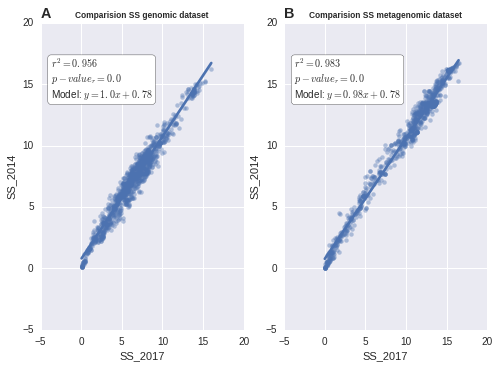

In [20]:
plt.subplot(121)
x= 'SS_2017'
y = 'SS_2014'
with sns.axes_style("whitegrid"):
    plot_reg(x, y, comparision_gen)
    plt.title('Comparision SS genomic dataset',fontweight='bold', fontsize='small')

plt.savefig('linear.regresion.png'.format(x,y), dpi=300)
plt.title('A', fontweight='bold', fontsize='x-large', loc='left')

plt.subplot(122)
x= 'SS_2017'
y = 'SS_2014'

with sns.axes_style("whitegrid"):
    plot_reg(x, y, comparision_met)
    plt.title('Comparision SS metagenomic dataset',fontweight='bold', fontsize='small')
    plt.title('B', fontweight='bold', fontsize='x-large', loc='left')
#plt.savefig('{}_vs_{}.gen.png'.format(x,y), dpi=300)#.subplot(122)
plt.savefig('linear.regresion.png'.format(x,y), dpi=300)